In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
part_1b = pd.read_csv("Lab2_343_Task 1.csv", skiprows=7, header=None)
part_1b = part_1b.drop(part_1b.columns[0], axis=1)
part_1b = part_1b.set_index(1).T
part_1b = part_1b.reset_index(drop=True)
display(part_1b)

1,Measurement,V1(ave) [V],I1(ave) [A],n1 (ave) [RPM],calculation,kt [V*sec/rad],Average kt,Tfric [Nm]
0,1.0,5.05,0.72,188.0,NaN,0.233812,0.231216,0.166475
1,2.0,9.91,0.83,380.0,NaN,0.236090,NaN,0.191909
2,3.0,15.12,0.91,600.0,NaN,0.231653,NaN,0.210406
3,4.0,20.06,0.97,802.0,NaN,0.231683,NaN,0.224279
4,5.0,25.02,1.01,1014.0,NaN,0.229721,NaN,0.233528
5,6.0,30.00,1.03,1222.0,NaN,0.229439,NaN,0.238152
6,NaN,35.06,1.04,1435.0,NaN,0.229014,NaN,0.240464
7,NaN,40.40,1.05,1663.0,NaN,0.228314,NaN,0.238152


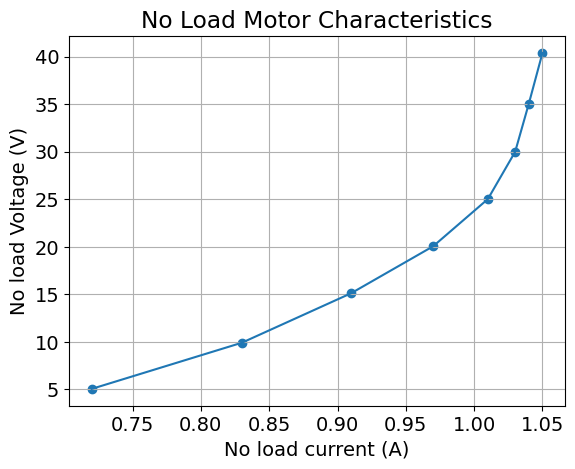

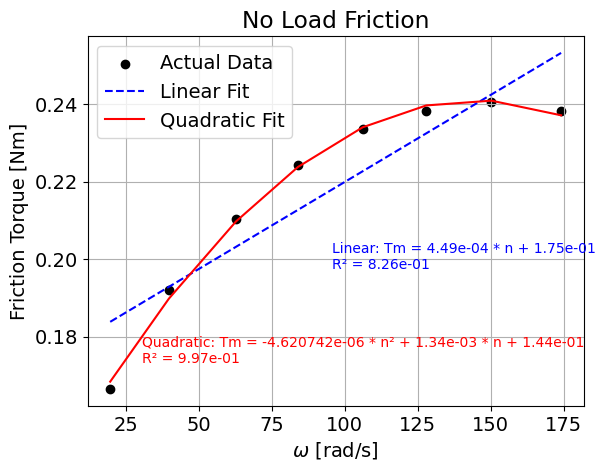

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
plt.rcParams.update({'font.size': 14})
y  = part_1b["V1(ave) [V]"]
x  = part_1b["I1(ave) [A]"]

plt.plot(x, y, label="No load")
plt.xlabel("No load current (A)")
plt.ylabel("No load Voltage (V)")
plt.scatter(x, y, marker="o")
plt.title("No Load Motor Characteristics")
plt.grid()
plt.savefig("output/no_load_voltage_current.png")
plt.show()

# x = part_1b["n1 (ave) [RPM]"].values.reshape(-1, 1)
# y = part_1b["Tfric [Nm]"]
# model = LinearRegression()
# model.fit(x,y)
# y_predict = model.predict(x)
# r2_model = r2_score(y, y_predict)

# model.fit(x,y)

# plt.scatter(x, y, label="Measured Data")
# plt.plot(x, y_predict, label="Fitted Data")
# plt.show()

x = part_1b["n1 (ave) [RPM]"].values.reshape(-1, 1) * 2 * np.pi / 60
y = part_1b["Tfric [Nm]"]
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred_linear = linear_model.predict(x)
r2_linear = r2_score(y, y_pred_linear)
linear_eq = f"Linear: Tm = {linear_model.coef_[0]:.2e} * n + {linear_model.intercept_:.2e}\nR² = {r2_linear:.2e}"

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
quad_model = LinearRegression()
quad_model.fit(x_poly, y)
y_pred_quad = quad_model.predict(x_poly)
r2_quad = r2_score(y, y_pred_quad)
quad_eq = (f"Quadratic: Tm = {quad_model.coef_[2]:.6e} * n² + "
           f"{quad_model.coef_[1]:.2e} * n + {quad_model.intercept_:.2e}\nR² = {r2_quad:.2e}")
plt.scatter(x, y, color='black', label="Actual Data")
plt.plot(x, y_pred_linear, 'b--', label="Linear Fit")
plt.plot(x, y_pred_quad, 'r-', label="Quadratic Fit")
plt.text(x.mean(), max(y)*0.85, linear_eq, fontsize=10, color='blue', verticalalignment='top')
plt.text(x.mean() - 65, max(y)*0.75, quad_eq, fontsize=10, color='red', verticalalignment='top')

B = linear_model.coef_[0]
# Labels and legend
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel("Friction Torque [Nm]")
plt.title("No Load Friction")
plt.legend()
plt.grid()
plt.savefig("output/1b_no_load_friction.png")
plt.show()

In [29]:
part2a = pd.read_csv("Lab 2 343 - Task 2.csv", skiprows=2, nrows=12, header=None)
part2a = part2a.drop(part2a.columns[0], axis=1)
part2a = part2a.set_index(1).T
display(part2a)

1,Measurement #,V1(ave)[V],I1(ave)[A],P1(ave) [W],NaN,V2(ave)[V],I2(ave)[A],P2(ave) [W],NaN,n [RPM],Tm [Nm],P2/P1
2,1.0,44.60,0.84,82.2,NaN,42.65,0.00,0.2,NaN,1790.0,0.24,0.002
3,2.0,44.71,2.68,119.0,NaN,41.30,0.83,34.5,NaN,1781.0,0.43,0.290
4,3.0,44.60,3.45,154.4,NaN,40.27,1.62,65.3,NaN,1750.0,0.63,0.423
5,4.0,44.70,4.17,186.0,NaN,39.24,2.36,92.5,NaN,1733.0,0.83,0.497
6,5.0,44.71,4.86,217.4,NaN,38.30,3.07,117.9,NaN,1715.0,1.01,0.542
7,6.0,44.70,5.49,245.6,NaN,37.20,3.71,138.2,NaN,1685.0,1.18,0.563


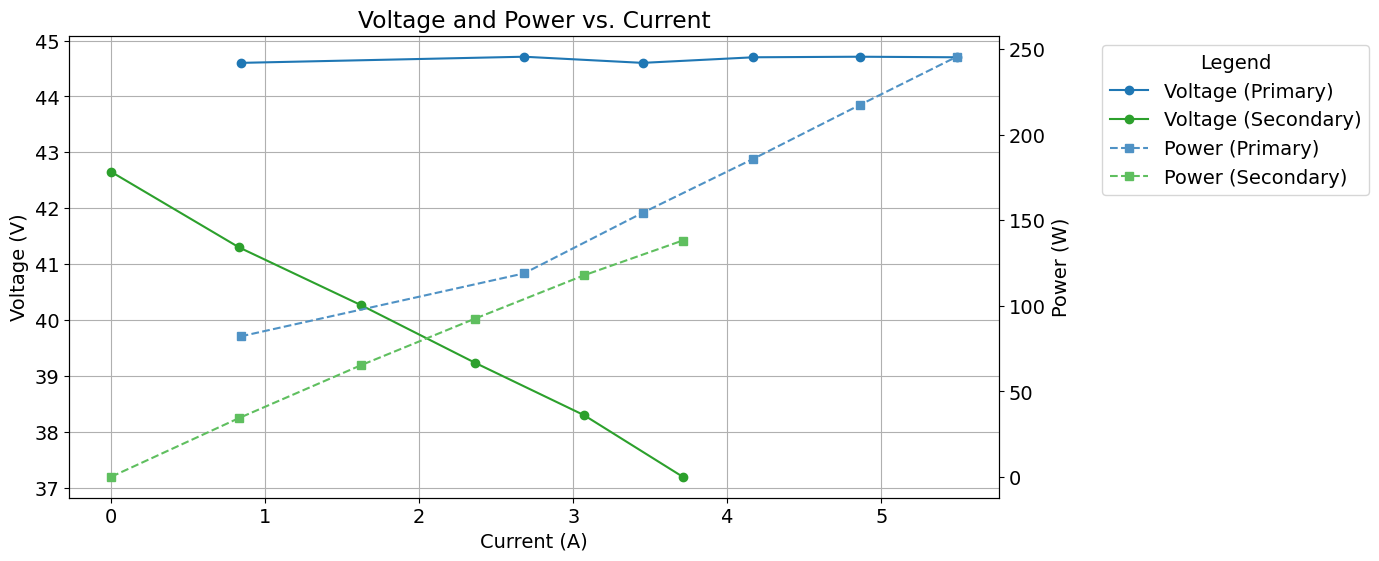

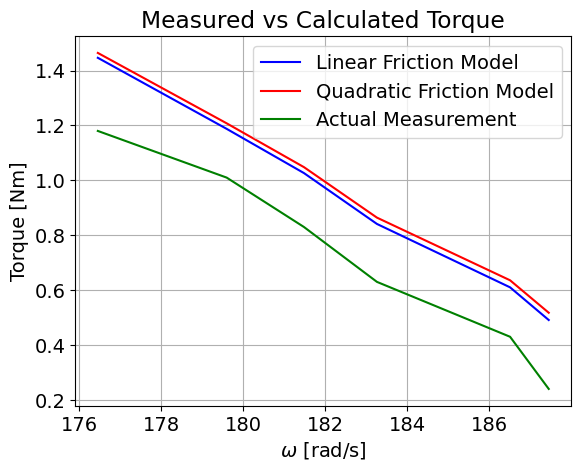

In [53]:
fix, ax1 = plt.subplots(figsize=(12, 6))
x1 = part2a["I1(ave)[A]"]
p1 = part2a["P1(ave) [W]"]
v1 = part2a["V1(ave)[V]"]
x2 = part2a["I2(ave)[A]"]
p2 = part2a["P2(ave) [W]"]
v2 = part2a["V2(ave)[V]"]

plt.grid()
ax2 = ax1.twinx()

primary_voltage_color = "#1f77b4"  # Standard blue
primary_power_color = "#4f92c5"    # Lighter blue
secondary_voltage_color = "#2ca02c"  # Standard green
secondary_power_color = "#5fbf5f"    # Lighter green

# Voltage plots (solid lines with circles)
line1, = ax1.plot(x1, v1, 'o-', color=primary_voltage_color, label="Voltage (Primary)")
line2, = ax1.plot(x2, v2, 'o-', color=secondary_voltage_color, label="Voltage (Secondary)")

# Power plots (dashed lines with squares)
line3, = ax2.plot(x1, p1, 's--', color=primary_power_color, label="Power (Primary)")
line4, = ax2.plot(x2, p2, 's--', color=secondary_power_color, label="Power (Secondary)")

# Set labels
ax1.set_ylabel("Voltage (V)")
ax2.set_ylabel("Power (W)")
ax1.set_xlabel("Current (A)")

# Create combined legend
lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left", bbox_to_anchor=(1.1, 1), title="Legend")

# ax1.legend(lines, labels, loc="lower right", title="Legend")

plt.title("Voltage and Power vs. Current")
# plt.grid()
plt.savefig("output/2a_Voltage and power.png")
plt.show()

omega = part2a["n [RPM]"] * 2 * np.pi / 60
T = part2a["Tm [Nm]"]
k_v = 0.227
Ra = 0.62
# y_pred_quad
x_predict = omega.values.reshape(-1, 1)
x_predict_poly = poly.transform(x_predict)  # Use transform, NOT fit_transform
y2_predict = quad_model.predict(x_predict_poly)  # Now it has the right shape
y1_predict = linear_model.predict(x_predict)
Tcalc_square = (part2a["V1(ave)[V]"]-k_v*omega)*k_v/Ra - y2_predict
# Tcalc_square = part2a["I1(ave)[A]"]*k_v - y2_predict
# Tcalc_linear = part2a["I1(ave)[A]"]*k_v - y1_predict
Tcalc_linear = (part2a["V1(ave)[V]"]-k_v*omega)*k_v/Ra - y1_predict
# Te = k_v*part2a[""]
plt.grid()
plt.plot(omega, Tcalc_linear, label="Linear Friction Model", color='b')
plt.plot(omega, Tcalc_square, label="Quadratic Friction Model", color='r')
plt.plot(omega, T, label="Actual Measurement", color='g')
plt.xlabel("$\omega$ [rad/s]")
plt.ylabel("Torque [Nm]")
plt.title("Measured vs Calculated Torque")
plt.legend()
plt.savefig("output/5a_measured_vs_calculated_torque.png")
# Tcalc
# display(Tcalc_square)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

x = part2a["n [RPM]"].values.reshape(-1, 1)
y = part2a["Tm [Nm]"].values

linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred_linear = linear_model.predict(x)
r2_linear = r2_score(y, y_pred_linear)
linear_eq = f"Linear: Tm = {linear_model.coef_[0]:.4f} * n + {linear_model.intercept_:.4f}\nR² = {r2_linear:.4f}"

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
quad_model = LinearRegression()
quad_model.fit(x_poly, y)
y_pred_quad = quad_model.predict(x_poly)
r2_quad = r2_score(y, y_pred_quad)
quad_eq = (f"Quadratic: Tm = {quad_model.coef_[2]:.6f} * n² + "
           f"{quad_model.coef_[1]:.4f} * n + {quad_model.intercept_:.4f}\nR² = {r2_quad:.4f}")
plt.scatter(x, y, color='black', label="Actual Data")
plt.plot(x, y_pred_linear, 'b--', label="Linear Fit")
plt.plot(x, y_pred_quad, 'r-', label="Quadratic Fit")
plt.text(min(x), max(y)*0.5, linear_eq, fontsize=10, color='blue', verticalalignment='top')
plt.text(min(x), max(y)*0.3, quad_eq, fontsize=10, color='red', verticalalignment='top')

# Labels and legend
plt.xlabel("n [RPM]")
plt.ylabel("Torque [Nm]")
plt.title("Loaded Motor Torque vs Speed")
plt.legend()
plt.grid()
plt.savefig("output/2a_friction_torque.png")
plt.show()

## 1C

,Time (ms),Ch1 V,Ch2 V,Ch1 A,Ch2 A,RPM,Torque
0,0.000,42.314,0.000,1.185,0.025,1631.550,-0.041
1,0.063,42.289,-0.006,1.217,0.033,1643.734,-0.043
2,0.125,42.107,-0.006,1.250,0.041,1630.331,-0.041
3,0.188,41.857,0.006,1.258,0.033,1644.953,-0.041
4,0.250,41.473,0.000,1.275,0.025,1629.113,-0.041
...,...,...,...,...,...,...,...
31963,1999.286,0.006,0.006,0.005,0.041,1.218,-0.036
31964,1999.348,0.006,-0.006,0.005,0.033,2.437,-0.036
31965,1999.411,0.006,0.006,0.013,0.033,2.437,-0.035
31966,1999.473,0.012,0.000,0.013,0.033,2.437,-0.035


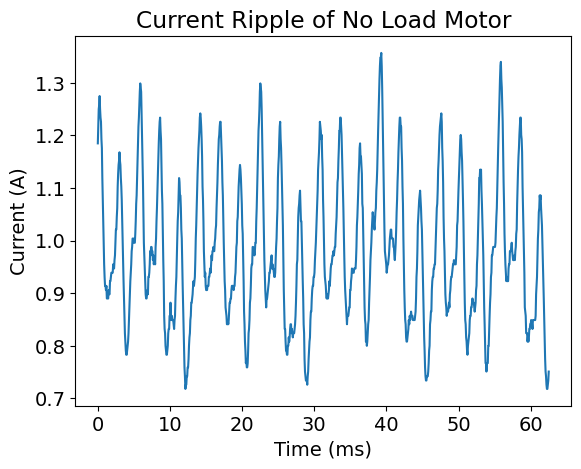

In [70]:
part1c = pd.read_csv("recorded_data/other/task1c.txt", delimiter="\t")
# part1c = part1c[part1c["Time (ms)"] < 750]
display(part1c)
x = part1c["Time (ms)"][0:1000]
y2 = part1c["Ch1 A"][0:1000]
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.plot(x, y2)
plt.title("Current Ripple of No Load Motor")
plt.savefig("output/1c_ripple.png")
plt.show()


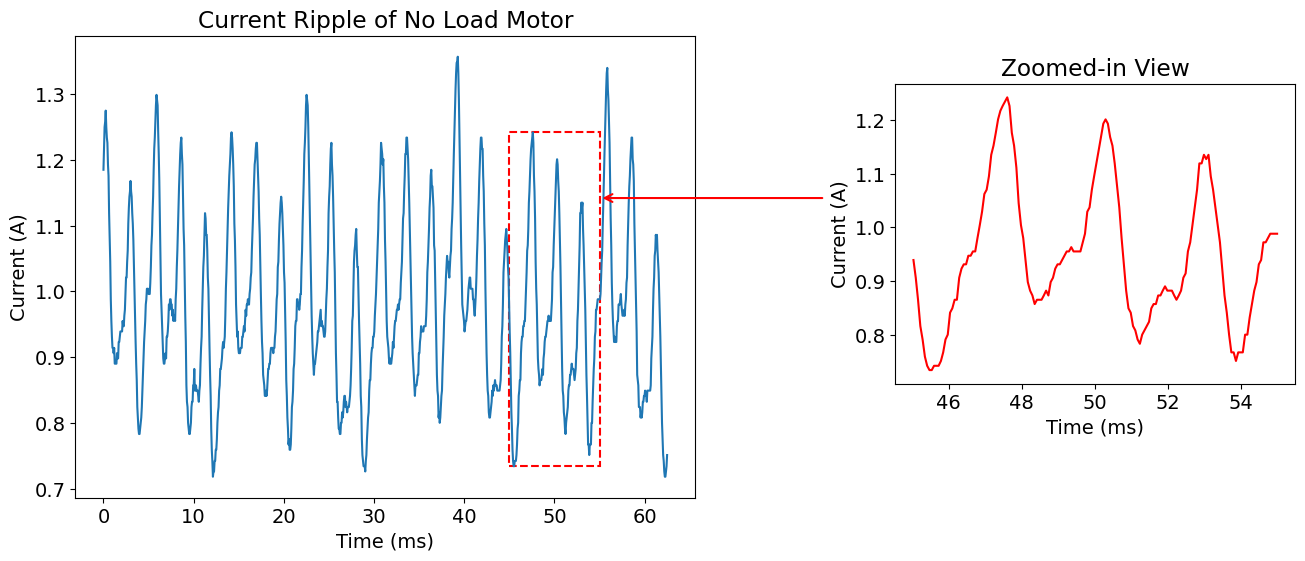

In [75]:
zoom_start, zoom_end = 45, 55

# Create the figure and main plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot main data
ax.plot(x, y2, label="Current (A)")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Current (A)")
ax.set_title("Current Ripple of No Load Motor")

# Define zoomed-in region
mask = (x >= zoom_start) & (x <= zoom_end)
zoom_x = x[mask]
zoom_y = y2[mask]

# Create inset zoomed plot
ax_inset = fig.add_axes([1.15, 0.3, 0.5, 0.5])  # Adjust position and size
ax_inset.plot(zoom_x, zoom_y, color="red")
ax_inset.set_title("Zoomed-in View")
ax_inset.set_xlabel("Time (ms)")
ax_inset.set_ylabel("Current (A)")

# Draw a rectangle around the zoomed-in area
ax.add_patch(
    plt.Rectangle((zoom_start, min(zoom_y)), zoom_end - zoom_start, max(zoom_y) - min(zoom_y),
                  edgecolor="red", facecolor="none", linestyle="dashed", linewidth=1.5)
)

# Draw an arrow connecting the rectangle to the inset
ax.annotate("", xy=(55, max(zoom_y) - 0.1), xytext=(80, max(zoom_y) - 0.1),
            arrowprops=dict(arrowstyle="->", color="red", linewidth=1.5))

# Display the plot
plt.show()

## 3B

,Time (ms),Ch1 V,Ch2 V,Ch1 A,Ch2 A,RPM,Torque
0,0.000,21.979,19.781,3.716,2.205,869.368,-0.704
1,0.002,48.122,19.775,3.700,2.205,870.586,-0.700
2,0.003,49.224,19.787,3.716,2.213,886.426,-0.699
3,0.005,49.285,19.763,3.741,2.197,876.679,-0.700
4,0.007,49.291,19.781,3.774,2.205,883.989,-0.699
...,...,...,...,...,...,...,...
2927,4.830,-0.304,19.750,3.675,2.254,885.208,-0.699
2928,4.831,43.550,19.732,3.692,2.254,904.704,-0.700
2929,4.833,49.059,19.757,3.725,2.254,893.737,-0.701
2930,4.834,49.266,19.744,3.757,2.254,897.393,-0.700


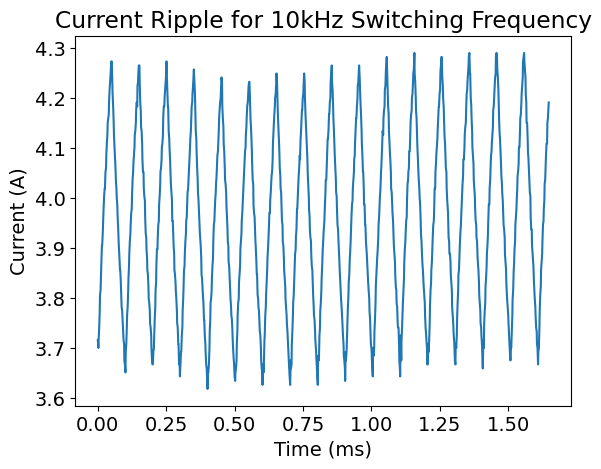

In [69]:
part3b = pd.read_csv("recorded_data/task3b_0.5", delimiter="\t")
# part3b = part1c[part1c["Time (ms)"] > 750]
display(part3b)
x = part3b["Time (ms)"][0:1000]
y2 = part3b["Ch1 A"][0:1000]
plt.plot(x, y2)
plt.title("Current Ripple for 10kHz Switching Frequency")
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.savefig("output/3b_ripple.png")


12191.489361702117

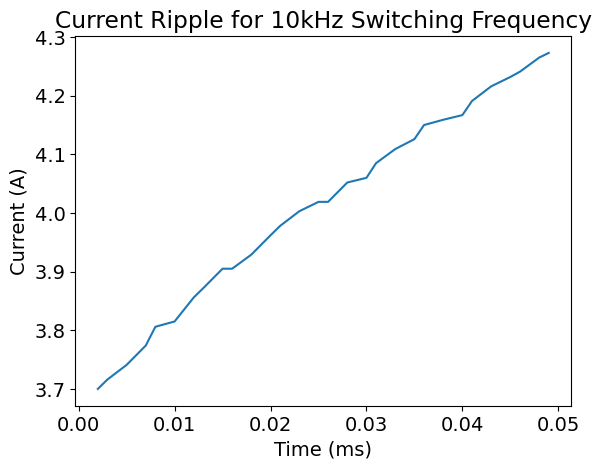

In [72]:
part3b = pd.read_csv("recorded_data/task3b_0.5", delimiter="\t")
# part3b = part1c[part1c["Time (ms)"] > 750]
x = part3b["Time (ms)"][1:31]
y2 = part3b["Ch1 A"][1:31]
plt.plot(x, y2)
plt.title("Current Ripple for 10kHz Switching Frequency")
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
didt = (max(y2)-min(y2))/(max(x) - min(x))*1000
didt
va = 49.303 - 3.815*0.65